In [1]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/new_advBIM_ratio'
idx_code = 1

files = [f for f in os.listdir(resDir) if f.endswith('balancesample.csv')]
querys = list(set([f.split('_')[5] for f in files]))
eps = [float(q.split('-')[idx_code]) for q in querys]
querys = [x for _, x in sorted(zip(eps, querys))]
print(querys)

['AdversarialBIM-0.5-0.1-0.001', 'AdversarialBIM-0.6-0.1-0.001', 'AdversarialBIM-0.7-0.1-0.001', 'AdversarialBIM-0.8-0.1-0.001', 'AdversarialBIM-0.9-0.1-0.001']


MCF7
          acc        f1
0.5  0.695877  0.560152
0.6  0.697709  0.563550
0.7  0.701322  0.565265
0.8  0.692134  0.565293
0.9  0.703478  0.567948


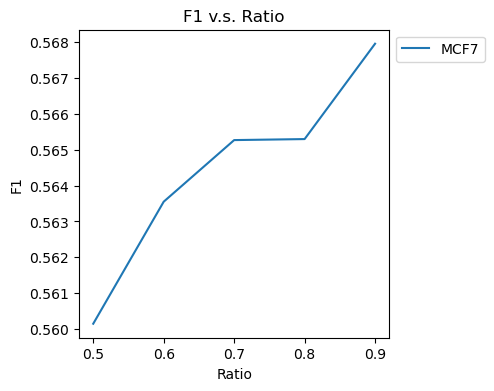

In [5]:
# y = [0]*7
y = [0]*5

celllist = ['A549', 'MCF7', 'PC3'][1:-1]
fig, ax = plt.subplots(1,1, figsize=(4,4))
for c in celllist:
    print(c)
    filesc = [f for f in files if c in f]
    # [print(fq) for fq in filesc]
    f1_all, precision_all, recall_all = [],[],[]
    df_c = pd.DataFrame()
    for q in querys:
        fqc = [f for f in filesc if q in f][0]
        # print(q)
        df = pd.read_csv(f'{resDir}/{fqc}', index_col=0)
        # print(df)
        # print(df.mean(1))
        df_c[float(q.split('-')[idx_code])] = df.mean(1)
        # print(df.T.to_numpy().mean(0))
        # print(df.T.to_numpy().std(0))
    # print(df_c.index)
    print(df_c.loc[['acc', 'f1']].T)
    # df_c.T.to_csv(f'{resDir}/all_summary_{c}.csv')
    y = [df_c.T.f1.to_list()[i] + y[i] for i in range(len(y))]
    x = df_c.T.index.to_list()
    ax.plot(df_c.T.index.to_list(), df_c.T.f1.to_list(), label=c)
# ax.plot(x, [e/3 for e in y], '--', label='mean', linewidth=5.0)
plt.legend(bbox_to_anchor=(1, 1))


plt.title('F1 v.s. Ratio')
plt.xlabel('Ratio')
plt.ylabel('F1')

# plt.ylabel('F1')
# plt.xlabel('Distance')
# plt.title('F1 v.s. Distance')

# fig.tight_layout()
plt.show()